In [1]:
#Import requests for web scraping
import pandas as pd
import requests as rq
import numpy as np
import collections

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mpl
import matplotlib.pyplot as plt

# import k-means from clustering stage
from PIL import Image
from matplotlib import rcParams

print('Libraries installed')

Libraries installed


In [2]:
website_url= rq.get('https://cuestionpublica.com/discurso-de-posesion-gustavo-petro/').text #Bring the data from the target URL

In [3]:
#Import BeautifulSoup for html structure information from our request
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')

data = [element.text for element in soup.find_all("p")] #Retrieving text from "p" founds
data = str(data) #Convert to string
data

"['\\n\\nAceptar políticas de privacidad y tratamiento de datos personales\\n\\n', '', '(07/08/2022)', 'Llegar aquí indudablemente implica recorrer una vida. La vida inmensa que nunca se recorre sola. Aquí está mi madre, Clara, nada existiría en mi mente en este momento sin ella. Aquí está mi padre, Gustavo, caribeño, aquí están mis hermanos Adriana y Juan que me aguantan.', 'Aquí están mis hijos, Nicolás Petro, Nicolás Alcocer, Andrea y Andrés, Sofia y Antonella, mis pequeñas que florecen de corazón y alma. Aquí está Verónica Alcocer, quien me ha acompañado, quien me ha dado descendencia, la vida misma. Quien el amor ha hecho todo posible. Aquí no estará para acompañarme solamente sino para acompañar a las mujeres de Colombia en su esfuerzo para salir adelante, para crear, para luchar, para ser. Para superar la violencia dentro y fuera de las familias, para construir la política del amor.', 'Aquí está como en el recorrido de mi existencia, el pueblo. Las manos humildes del obrero, aqu

In [4]:
from stop_words import get_stop_words #The words we want to ignore

stop_words_es = get_stop_words('es') #Spanish StopWords

In [5]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [14]:
stop_words = ["aqui","aquí","través","vez","toda","todas","debe","hoy","cada","solo","hora","ser","si","xa0", "xa0'","año", "mil", "millones", "pesos", "ciento", "El", "En", "Aceptar", "políticas", "de", "privacidad", "y", "tratamiento", "datos", "personales"] + stop_words_es #Adding aditional StopWords who causes noise in the result image
#initiate world cloud object
petro_wc = WordCloud(
    background_color='white',
    max_words=20000,
    stopwords=stop_words
)
# generate the word cloud
petro_wc.generate(data)

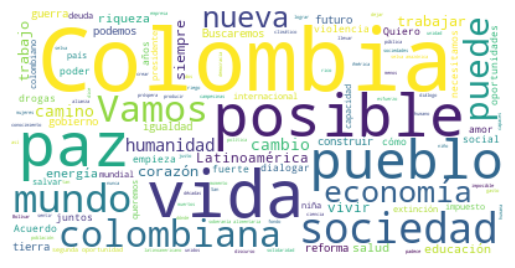

In [15]:
# display the word cloud
plt.imshow(petro_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

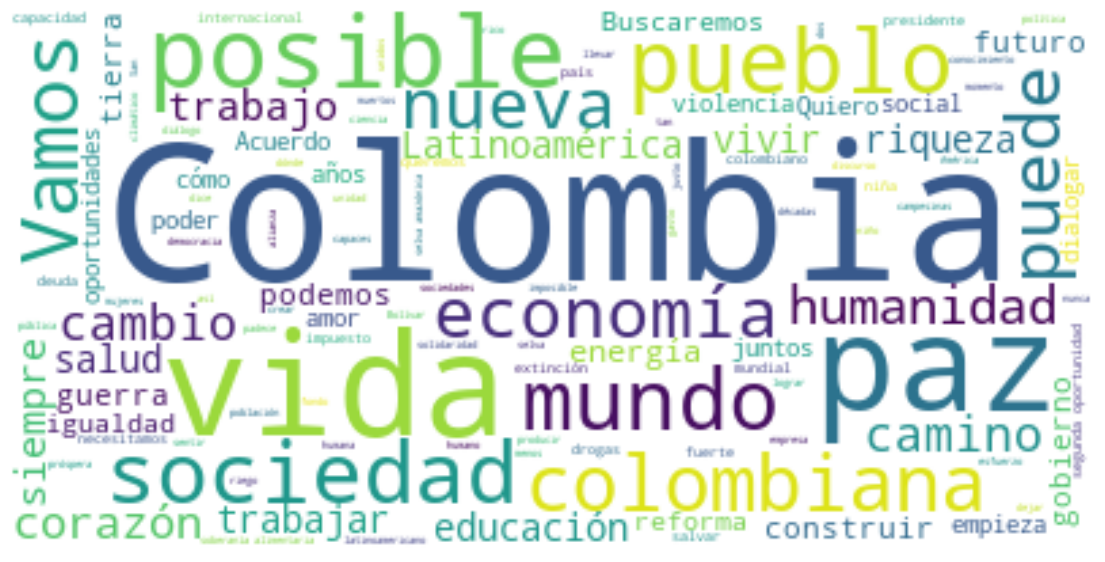

In [16]:
# re-generate the word cloud
petro_wc.generate(data)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(petro_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
#!pip install wget
import wget
url = 'https://github.com/fabianchoxD/petro-word-counter-plot/blob/main/colombia-bn.jpg'
filename = wget.download(url)

print(filename)

colombia-bn (2).jpg


In [18]:
col_mask = np.array(Image.open('colombia-bn.jpg'))

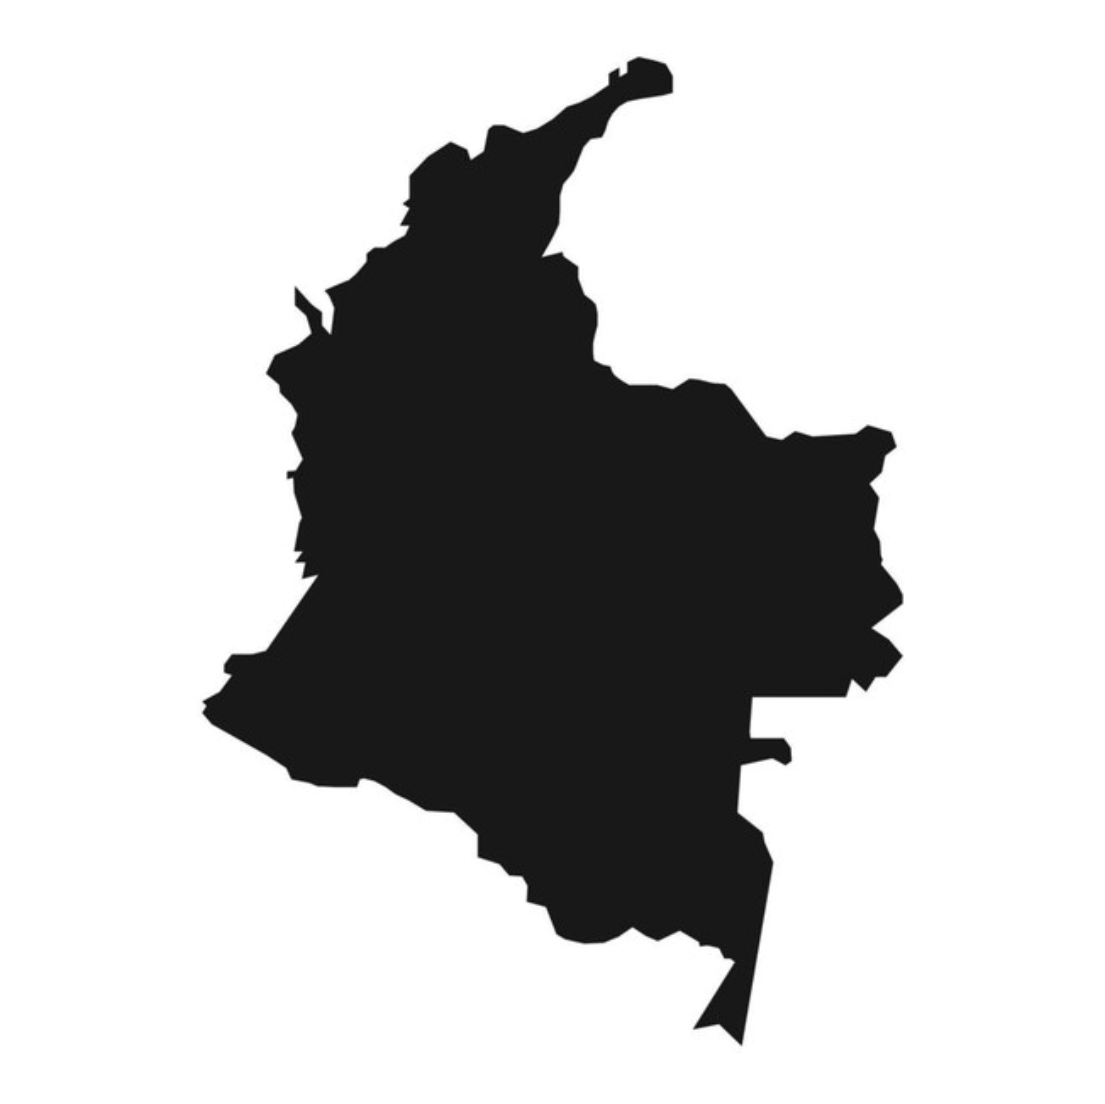

In [19]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(col_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

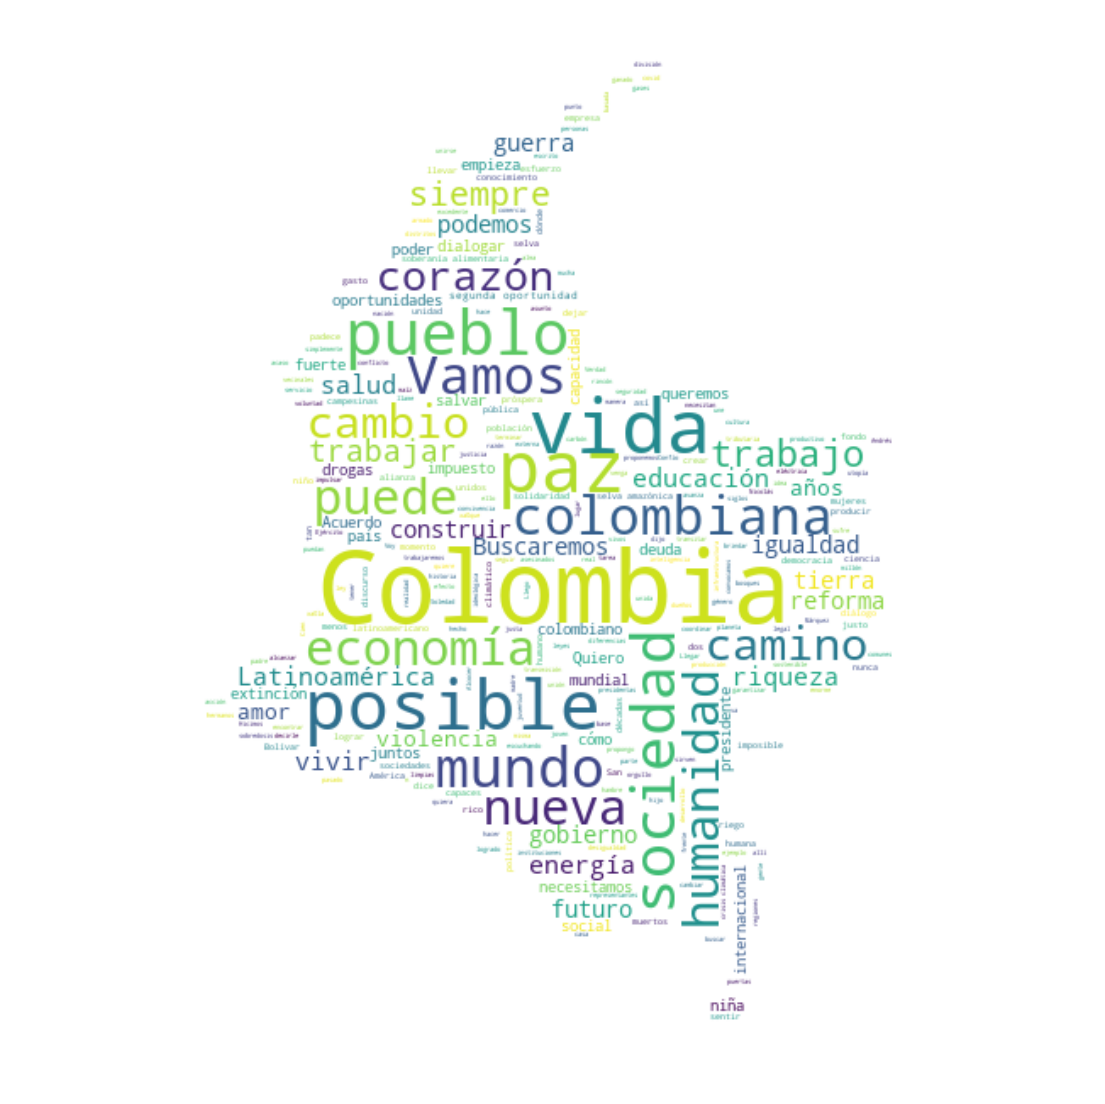

In [22]:
# instantiate a word cloud object
petro_wc = WordCloud(background_color='white', max_words=2000, mask=col_mask, stopwords=stop_words)

# generate the word cloud
petro_wc.generate(data)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(petro_wc, interpolation='bilinear')
plt.axis('off')
plt.show()